Exemplo retirado de [Diego Souza (INPE)](https://github.com/diegormsouza)

# **1° Passo:** Instalando as bibliotecas

netcdf4, boto3 e cartopy

In [1]:
!pip install -q netcdf4 boto3

!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 11.6 MB/s eta 0:00:00
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 74.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to 

In [2]:
!pip install 'gdal==3.0.4'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 kB 5.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


gdal

In [3]:
!dpkg -l | grep libgdal

ii  libgdal-dev                               3.4.3+dfsg-1~jammy0                     amd64        Geospatial Data Abstraction Library - Development files
ii  libgdal30                                 3.4.3+dfsg-1~jammy0                     amd64        Geospatial Data Abstraction Library


In [4]:
!ogrinfo --version

/bin/bash: line 1: ogrinfo: command not found


In [5]:
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ubuntugis-unstable/ubuntu/ jammy main'
Description:
Unstable releases of Ubuntu GIS packages. These releases are more bleeding edge and while generally they should work well, they dont receive the same amount of quality assurance as our stable releases do.
More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ubuntugis-unstable
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ubuntugis-unstable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ubuntugis-unstable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ubuntugis-unstable.gpg with fingerprint 6B827C12C2D425E227EDCA75089EBE08314DF160
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.dow

In [6]:
!apt update

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ubuntugis-unstable/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
69 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [7]:
!apt-get install gdal-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following package was automatically installed and is no longer required:
  libgeos3.10.2
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  gdal-data gdal-plugins libgdal32 libgeos-c1v5 libgeos-dev libgeos3.11.1
  libproj25 proj-bin proj-data python3-gdal python3-numpy
Suggested packages:
  libgdal-grass libgdal-doc python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin gdal-plugins libgdal32 libgeos3.11.1 libproj25 proj-bin
  python3-gdal python3-numpy
The following packages will be upgraded:
  gdal-data libgeos-c1v5 libgeos-dev proj-data
4 upgraded, 8 newly installed, 0 to remove and 65 not upgraded.
Need to get 24.3 MB of archives.
After this operation, 54.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467

In [8]:
!ogrinfo --version

GDAL 3.6.4, released 2023/04/17


# **2° Passo:** Download de arquivos auxiliares

In [9]:
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip br_unidades_da_federacao.zip

--2023-09-21 15:56:11--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  9.29MB/s    in 1.1s    

2023-09-21 15:56:13 (9.29 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]

Archive:  br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


# **3° Passo:** Montando drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/4_SATELITE/'

import sys
sys.path.append(f'{dir}')

# cria o diretório dos dados de saída
import os
os.makedirs(f'{dir}output', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Script 14 - Reprojection with GDAL
- Training: Python and GOES-R Imagery: Script 14 - Reprojection with GDAL

(<osgeo.gdal.GDALWarpAppOptions; proxy of <Swig Object of type 'GDALWarpAppOptions *' at 0x7c1a8e0a3720> >, None, None)


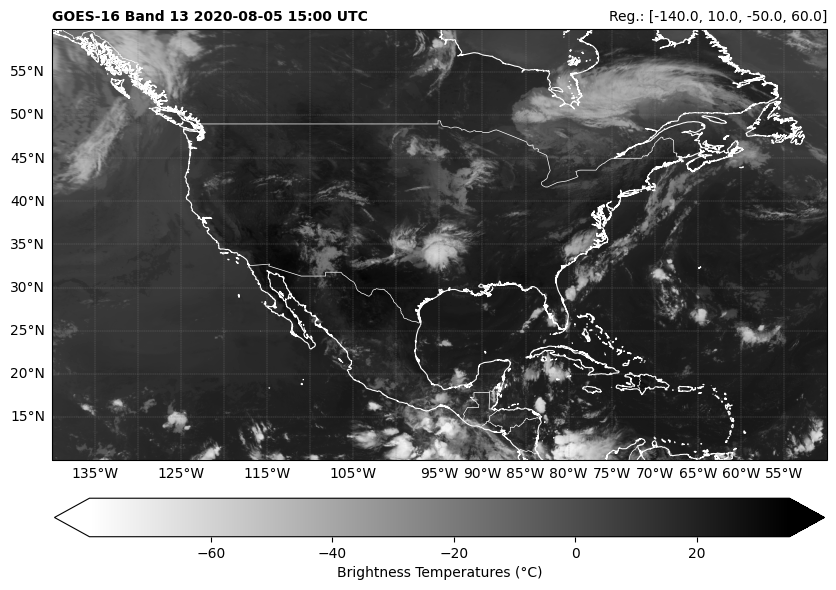

In [15]:
#================================================================================================#
#                                  IMPORTANDO BIBLIOTECAS
#================================================================================================#
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import datetime                   # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import osr                           # Python bindings for GDAL
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python
from utilities import download_CMI              # Our function for download

import warnings
warnings.filterwarnings("ignore")

#================================================================================================#
#                                  DEFINIÇÕES INICIAIS
#================================================================================================#
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-140.0, 10.0, -50.0, 60.0] # Min lon, Min lat, Max lon, Max lat

# Datetime to process
yyyymmddhhmn = '202008051500'
band = '13'

# Download the file
file_name = download_CMI(yyyymmddhhmn, band, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds = (ds * scale + offset) - 273.15

# Read the original file projection and configure the output projection
source_prj = osr.SpatialReference()
source_prj.ImportFromProj4(img.GetProjectionRef())

target_prj = osr.SpatialReference()
target_prj.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

# Reproject the data
GeoT = img.GetGeoTransform()
driver = gdal.GetDriverByName('MEM')
raw = driver.Create('raw', ds.shape[0], ds.shape[1], 1, gdal.GDT_Float32)
raw.SetGeoTransform(GeoT)
raw.GetRasterBand(1).WriteArray(ds)

# Define the parameters of the output file
options = gdal.WarpOptions(format = 'netCDF',
          srcSRS = source_prj,
          dstSRS = target_prj,
          outputBounds = (extent[0], extent[3], extent[2], extent[1]),
          outputBoundsSRS = target_prj,
          outputType = gdal.GDT_Float32,
          srcNodata = undef,
          dstNodata = 'nan',
          xRes = 0.02,
          yRes = 0.02,
          resampleAlg = gdal.GRA_NearestNeighbour)

print(options)

# Write the reprojected file on disk
gdal.Warp(f'{dir}output/{file_name}_ret.nc', raw, options=options)
#-----------------------------------------------------------------------------------------------------------
# Open the reprojected GOES-R image
file = Dataset(f'{dir}output/{file_name}_ret.nc')

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{dir}output/GOES16_{yyyymmddhhmn}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()

In [18]:
import xarray as xr
ds = xr.open_dataset(f'{dir}output/OR_ABI-L2-CMIPF-M6C13_G16_s20202181500215_e20202181509535_c20202181510021_ret.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 2500, lon: 4500)
Coordinates:
  * lat      (lat) float64 59.99 59.97 59.95 59.93 ... 10.07 10.05 10.03 10.01
  * lon      (lon) float64 -140.0 -140.0 -139.9 -139.9 ... -50.05 -50.03 -50.01
Data variables:
    Band1    (lat, lon) float32 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.4.3, released 2022/04/22
    history:      Thu Sep 21 15:59:42 2023: GDAL Create( /content/drive/MyDri...

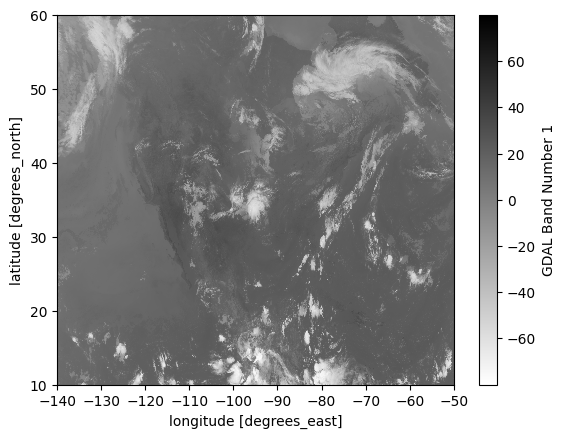

In [19]:
ds['Band1'].plot(cmap=colormap)